In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'Colab Notebooks'		   data     Personal		 'technical project'
 CRC_Nirat_satsangi_picture.jpeg   Haldii  'Satsang activities'


In [ ]:
data = pd.read_csv('/content/drive/My Drive/data/schools.csv')

In [ ]:
data['Year'].value_counts()

Year
2013    720
2022     10
2014      9
2015      8
2019      7
2020      6
2023      6
2017      5
2018      3
2021      2
Name: count, dtype: int64

In [ ]:


data = data.drop(columns={"Unnamed: 0"})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DCU                               776 non-null    float64
 1   Maynooth U                        776 non-null    float64
 2   TU Dublin                         776 non-null    float64
 3   Letterkeny                        776 non-null    float64
 4   National College of Ireland       776 non-null    float64
 5   TCD                               776 non-null    float64
 6   AIT                               776 non-null    float64
 7   Dundalk                           776 non-null    float64
 8   Waterford                         776 non-null    float64
 9   Cork IT                           776 non-null    float64
 10  DIT                               776 non-null    float64
 11  Blanchardstown                    776 non-null    float64
 12  Carlow I

In [ ]:
data.index

RangeIndex(start=0, stop=776, step=1)

In [ ]:
data_t = data[0:0].T
data_t['college'] = data_t.index
data_t = data_t.reset_index()

In [ ]:
data_t = data_t[data_t["college"]!="Total sitting Leaving Cert"]
data_t = data_t[data_t["college"]!="Year"]
data_t = data_t[data_t["college"]!="Total of main colleges"]
data_t = data_t[data_t["college"]!="School"]
data_t = data_t[data_t["college"]!="Roll Number"]

In [ ]:
data_t.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    22 non-null     object
 1   college  22 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [ ]:
data_t.head()

,index,college
0,DCU,DCU
1,Maynooth U,Maynooth U
2,TU Dublin,TU Dublin
3,Letterkeny,Letterkeny
4,National College of Ireland,National College of Ireland


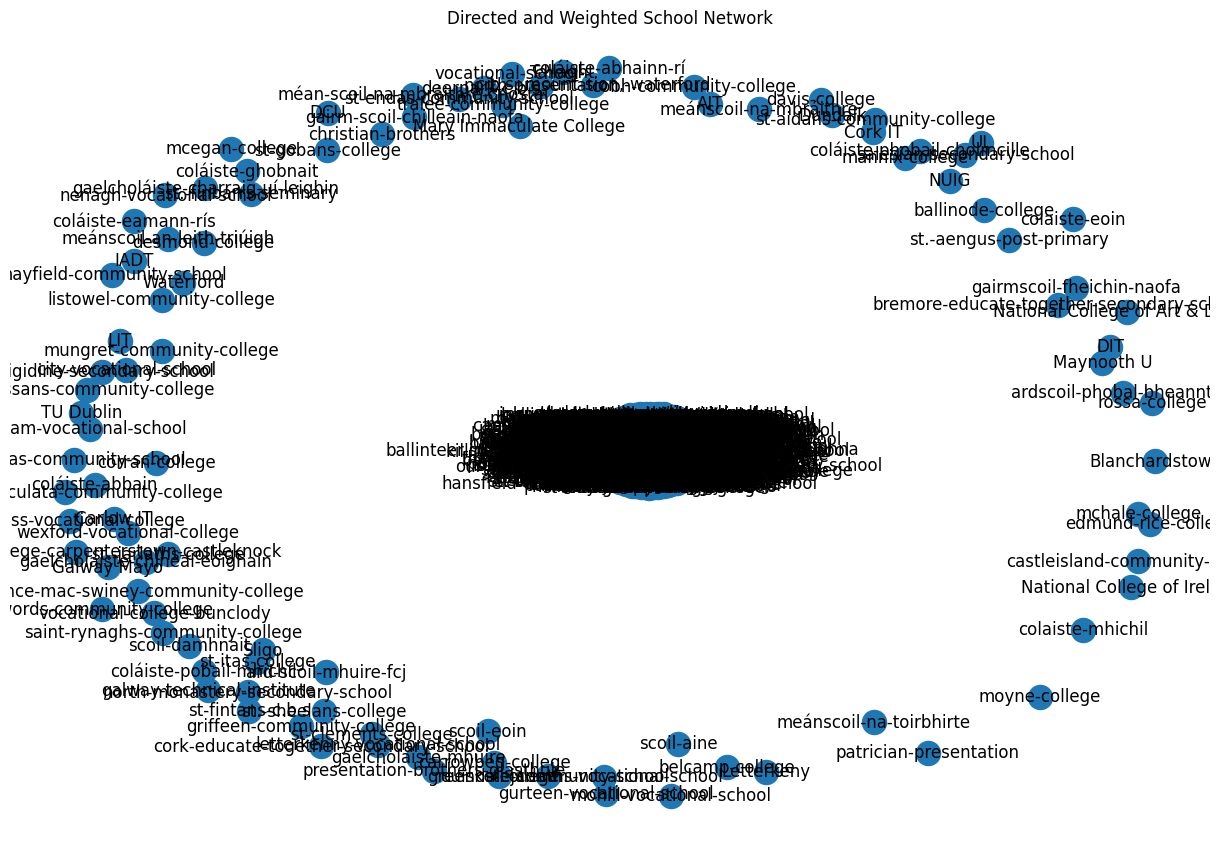

In [ ]:
# Create an empty graph
G = nx.Graph()

for index, row in data_t.iterrows():
  G.add_node(row['college'])

for index, row in data.iterrows():
  school = row['School']
  year = row['Year']
  # print(school)

  G.add_node(school)
  if row["TCD"] > 0:
    G.add_edge(school, "TCD")

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positioning nodes using a spring layout
nx.draw(G, pos, with_labels=True, arrows=True)
# Adding edge weights as labels
# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Directed and Weighted School Network')
plt.show()